<a href="https://colab.research.google.com/github/thakan25/myrep/blob/master/covid_track.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.0, 1.0, 'COVID-19 spread for China,India,Iran,\nItaly,Japan,Korea South and United Kingdom')

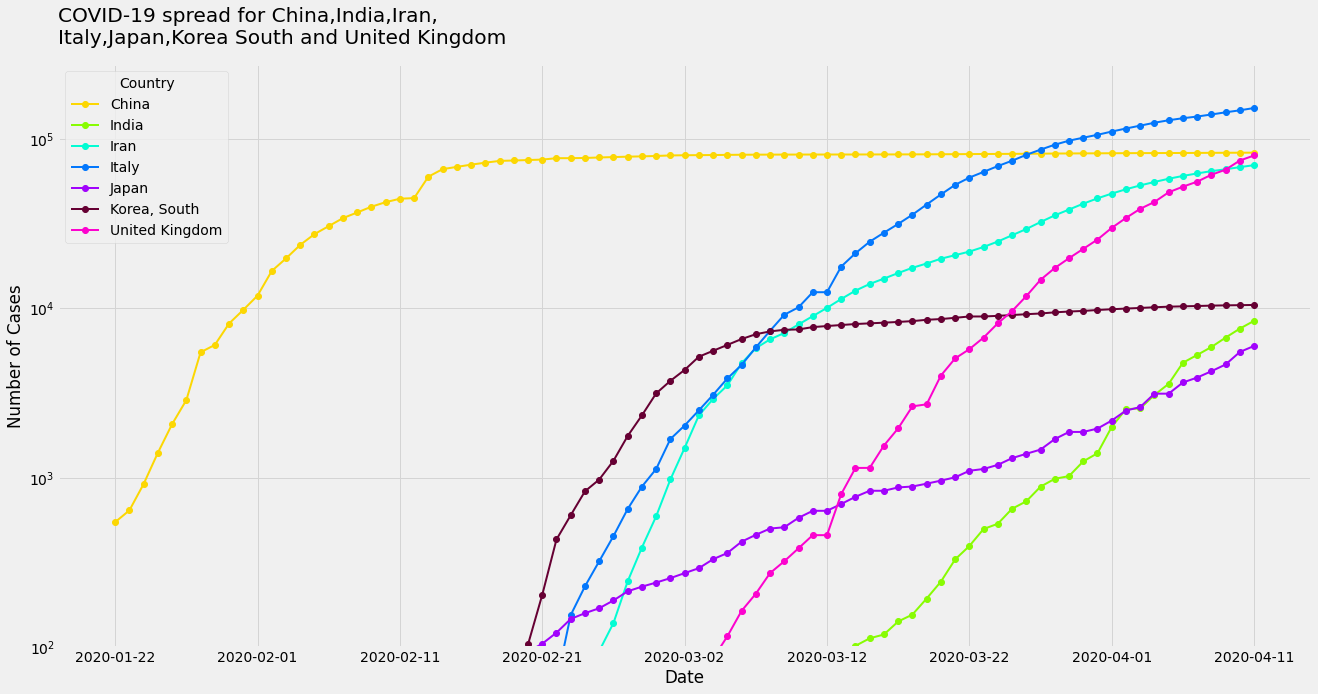

In [64]:
#COVID-19 tracking by SACHIN(180639),IIT Kanpur
#References-https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

# reading csv file
df=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv')

#checking correct uploading of data file
df.head()

#df.rename(columns={'dateRep':'date','countriesAndTerritories':'country','countryterritoryCode':'countrycode'},inplace=True)

df.query('Country=="India"').groupby('Date')[['Confirmed','Deaths']].sum().reset_index()

countries=['China','India','Iran','Italy','Japan','Korea, South','United Kingdom']

#selecting data only for required contries
df=df[df['Country'].isin(countries)]

#now pivoting data indexed as dates and countries as different columns
df=df.pivot(index="Date",columns="Country",values="Confirmed")
countries = list(df.columns)

#list of different colours for different contries
colors = {'China':'#fcd703', 'India':'#88fc03', 'Iran':'#03fcd3', 'Italy':'#0377fc', 'Japan':'#a103fc','Korea, South':'#660033', 'United Kingdom':'#fc03ce'}
plot = df.plot(figsize=(20,10), color=list(colors.values()), linewidth=2, legend=list(colors.values()),marker='o')

plt.yscale("log")

#to start tracking from 100th confirmed case
plt.ylim(ymin=100)

plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('Number of Cases')
plot.set_title("COVID-19 spread for China,India,Iran,\nItaly,Japan,Korea South and United Kingdom",pad=20,loc='left')
